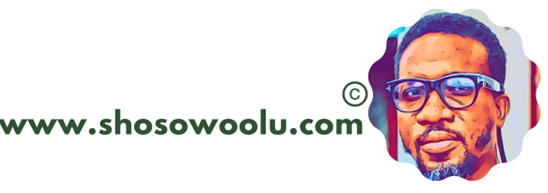


# Prediction of Success of Start-Ups Using Unbiased Classification Models

**Notebook 1: Exploratory Data Analysis and Data Cleaning**

**Purpose:** This notebook would be used to carry out the exploratory data analysis (EDA) of the datasets.



In [1]:
# Import python libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

### Explore all the files for high level details

In [3]:
# Read the checksum.csv file
checksum_df = pd.read_parquet('data/checksum.parquet')
checksum_df

,filename,previous_check_sum,current_check_sum
0,organizations.csv,ab7434773d09791639efaa57b43cd238,0ebd453c5e28e6e8e32e2514901655ca
1,organization_descriptions.csv,df8db645aa7d016e79e2c5e689e070c3,e0bae9d153078ee170f7d52f174e164e
2,people.csv,ed8f9aa4c94ac208d73a359c318964b3,c4acaadd962b739aaf0d05609b96c4d2
3,people_descriptions.csv,da27e27cd9d049a696222712219253d5,84660abcd042346b0ad0d6c3e4a76344
4,degrees.csv,33fac1f8284d441eba45ccc370432f60,e700b99dd553012117dc92c60a248269
5,funding_rounds.csv,58264bc245d9b7db937959131f436d6a,491d40b01d6b2013acf2b60b056d6a00
6,investments.csv,f72dd4ad5e7c08e085203745e4e0b095,83a90f5d55480049214337f37fcd7501
7,investment_partners.csv,96f35d3f3b80a7207bc6e690af7c7ea8,2c29da848534d3605eb819e754a86581
8,investors.csv,2c9b919297ade519be99465debcbe4d7,cb944c36b3bf6215cdaee012add8c685
9,funds.csv,bce8567b5c3c0f5daf3cd766be740ade,25918138f777a587f9ca349e45f16680


> This contains the list of all the individual tables (datasets) that hold information about the companies and related personnel

In [3]:
# Get the general information on the dataset 
checksum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   filename            17 non-null     object
 1   previous_check_sum  17 non-null     object
 2   current_check_sum   17 non-null     object
dtypes: object(3)
memory usage: 540.0+ bytes


> We would now explore each of the 17 datasets files

In [4]:
# Read the organizations.csv file and check the top 5 rows
organizations_df = pd.read_parquet('data/organizations.parquet')
organizations_df.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,207493.0,2007-05-25 13:51:27,2022-03-07 05:47:35,None,company,...,206-859-6300,https://www.facebook.com/Wetpaint,None,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,None,None,None,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13275.0,2007-05-26 02:30:28,2023-06-19 08:30:22,Zoho Corporation Pvt. Ltd.,"investor,company",...,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,None,None,None,company,2.0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25661.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://res.cloudinary.com/crunchbase-producti...,None,None,None,company,NaN
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,18929.0,2007-05-26 03:21:34,2022-07-19 01:45:23,None,"investor,company",...,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,None,None,None,investor,57.0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,5.0,2007-05-26 04:22:15,2023-05-04 18:27:53,"Meta Platforms, Inc.","investor,company",...,None,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://www.twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...,Facebook,"Facebook, Inc.",None,company,1.0


In [5]:
# Get the general information on the dataset
organizations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993917 entries, 0 to 2993916
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uuid                         object 
 1   name                         object 
 2   type                         object 
 3   permalink                    object 
 4   cb_url                       object 
 5   rank                         float64
 6   created_at                   object 
 7   updated_at                   object 
 8   legal_name                   object 
 9   roles                        object 
 10  domain                       object 
 11  homepage_url                 object 
 12  country_code                 object 
 13  state_code                   object 
 14  region                       object 
 15  city                         object 
 16  address                      object 
 17  postal_code                  object 
 18  status                       object 
 19  

In [6]:
# Read the organization_descriptions.csv file and check the top 5 rows
organization_descriptions = pd.read_csv('data/organization_descriptions.csv')
organization_descriptions.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,207493.0,2007-05-25 13:51:27,2022-03-07 05:47:35,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13275.0,2007-05-26 02:30:28,2023-06-19 08:30:22,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,25661.0,2007-05-26 03:03:23,2018-12-10 10:09:14,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,18929.0,2007-05-26 03:21:34,2022-07-19 01:45:23,"Pierre Omidyar, the founder of eBay, and his w..."
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,5.0,2007-05-26 04:22:15,2023-05-04 18:27:53,Meta is a social technology company that enabl...


In [7]:
# Get the general information on the dataset
organization_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348352 entries, 0 to 1348351
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   uuid         1348352 non-null  object 
 1   name         1348346 non-null  object 
 2   type         1348352 non-null  object 
 3   permalink    1348333 non-null  object 
 4   cb_url       1348334 non-null  object 
 5   rank         1347277 non-null  float64
 6   created_at   1348352 non-null  object 
 7   updated_at   1348352 non-null  object 
 8   description  1348342 non-null  object 
dtypes: float64(1), object(8)
memory usage: 92.6+ MB


In [8]:
# Read the people.csv file and check the top 5 rows
people = pd.read_csv('data/people.csv')
people.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,...,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,55365.0,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben,Elowitz,...,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,person,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,630741.0,2007-05-25 14:04:16,2018-02-12 23:14:37,Kevin,Flaherty,...,WA,Washington,Mercer Island,789e5e4d-0c90-d06e-92a0-b800b461c3da,DRSmedia,Team Member,NaN,http://www.linkedin.com/in/kevinflaherty,https://twitter.com/tallkp,https://res.cloudinary.com/crunchbase-producti...
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,13790.0,2007-05-26 02:33:03,2022-02-24 12:24:29,Raju,Vegesna,...,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,NaN,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://res.cloudinary.com/crunchbase-producti...
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,person,ian-wenig,https://www.crunchbase.com/person/ian-wenig,177742.0,2007-05-26 02:34:53,2021-03-23 10:25:04,Ian,Wenig,...,NaN,NaN,NaN,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,person,owen-byrne,https://www.crunchbase.com/person/owen-byrne,362200.0,2007-05-26 03:06:45,2022-04-08 19:52:41,Owen,Byrne,...,CA,California,Mountain View,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne,https://res.cloudinary.com/crunchbase-producti...


In [9]:
# Get the general information on the dataset
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764159 entries, 0 to 1764158
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   uuid                            object 
 1   name                            object 
 2   type                            object 
 3   permalink                       object 
 4   cb_url                          object 
 5   rank                            float64
 6   created_at                      object 
 7   updated_at                      object 
 8   first_name                      object 
 9   last_name                       object 
 10  gender                          object 
 11  country_code                    object 
 12  state_code                      object 
 13  region                          object 
 14  city                            object 
 15  featured_job_organization_uuid  object 
 16  featured_job_organization_name  object 
 17  featured_job_title         

In [10]:
# Read the people_descriptions.csv file and check the top 5 rows
people_descriptions = pd.read_csv('data/people_descriptions.csv')
people_descriptions.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,55365.0,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben Elowitz is a Member Board Of Directors at ...
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,person,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,630741.0,2007-05-25 14:04:16,2018-02-12 23:14:37,"Brand development, creative agency management,..."
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,13790.0,2007-05-26 02:33:03,2022-02-24 12:24:29,Raju is an evangelist for Zoho and is one of t...
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,person,ian-wenig,https://www.crunchbase.com/person/ian-wenig,177742.0,2007-05-26 02:34:53,2021-03-23 10:25:04,Ian Wenig has more then twenty years experienc...
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,person,owen-byrne,https://www.crunchbase.com/person/owen-byrne,362200.0,2007-05-26 03:06:45,2022-04-08 19:52:41,Legend has it that Owen Byrne was hired by [Di...


In [11]:
# Get the general information on the dataset
people_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196304 entries, 0 to 1196303
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   uuid         1196304 non-null  object 
 1   name         1196304 non-null  object 
 2   type         1196304 non-null  object 
 3   permalink    1196285 non-null  object 
 4   cb_url       1196285 non-null  object 
 5   rank         1194881 non-null  float64
 6   created_at   1196304 non-null  object 
 7   updated_at   1196304 non-null  object 
 8   description  1196291 non-null  object 
dtypes: float64(1), object(8)
memory usage: 82.1+ MB


In [12]:
# Read the degrees.csv file and check the top 5 rows
degrees = pd.read_csv('data/degrees.csv')
degrees.head()


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed
0,205fdfd1-ecac-aa43-262f-219f11755f67,MS Mass Communication @ Boston University,degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:40:03,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,NaN,1992-01-01,True
1,1a2ac288-eb99-3318-fde5-1517bc168f51,"BA English, French @ Washington University in...",degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:39:57,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,6ae9957a-8fb4-0ab1-73fa-dd547c4d3da4,Washington University in St. Louis,BA,"English, French",NaN,1990-01-01,True
2,b978d338-7ccc-7469-5ce7-ef98c34155ad,MS Internet Technology @ University of Greenwich,degree,NaN,NaN,NaN,2008-02-19 23:40:40,2018-02-13 01:43:09,29ea5efc-fd7a-402b-3a5d-b8660ac105ea,Sridhar Gundaiah,b5ea73f6-12a3-576d-ae9b-f4169147f974,University of Greenwich,MS,Internet Technology,NaN,2006-01-01,True
3,d01cfaad-0ccc-631e-0382-1e507bf6ba04,BS Computer Science @ Northeastern University,degree,NaN,NaN,NaN,2008-02-21 01:31:01,2018-02-13 01:43:33,45e29113-19f9-c828-68d0-42ad2ef04da0,John Furrier,5f84d9fa-78fd-14b0-d335-5ac3561cdc0a,Northeastern University,BS,Computer Science,NaN,1988-01-01,True
4,16a607f5-8ab3-573e-8d09-57b3e352e1d3,BS Computer Science @ Rochester Institute of ...,degree,NaN,NaN,NaN,2008-02-21 01:31:34,2018-02-13 01:39:53,b3b4ec6b-86fe-dd6e-ec8a-e8e7e999f274,Ian Reardon,1a380593-fb9d-7f7b-ae67-784ce3ff3690,Rochester Institute of Technology,BS,Computer Science,NaN,2002-01-01,True


In [13]:
# Get the general information on the dataset
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814667 entries, 0 to 814666
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uuid              814667 non-null  object 
 1   name              653462 non-null  object 
 2   type              814667 non-null  object 
 3   permalink         0 non-null       float64
 4   cb_url            0 non-null       float64
 5   rank              0 non-null       float64
 6   created_at        814667 non-null  object 
 7   updated_at        814667 non-null  object 
 8   person_uuid       814667 non-null  object 
 9   person_name       814663 non-null  object 
 10  institution_uuid  814557 non-null  object 
 11  institution_name  814557 non-null  object 
 12  degree_type       758708 non-null  object 
 13  subject           672917 non-null  object 
 14  started_on        485793 non-null  object 
 15  completed_on      531826 non-null  object 
 16  is_completed      81

In [14]:
# Read the funding_rounds.csv file and check the top 5 rows
funding_rounds = pd.read_csv('data/funding_rounds.csv')
funding_rounds.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,487936.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,321536.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,429589.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,164779.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,10500000.0,10500000.0,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,funding_round,geni-series-a--60e6afd9,https://www.crunchbase.com/funding_round/geni-...,354568.0,2007-05-31 20:19:28,2018-02-12 23:41:29,USA,CA,...,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c


In [15]:
# Get the general information on the dataset
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583192 entries, 0 to 583191
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   uuid                                583192 non-null  object 
 1   name                                583188 non-null  object 
 2   type                                583192 non-null  object 
 3   permalink                           583181 non-null  object 
 4   cb_url                              583181 non-null  object 
 5   rank                                583145 non-null  float64
 6   created_at                          583192 non-null  object 
 7   updated_at                          583192 non-null  object 
 8   country_code                        570406 non-null  object 
 9   state_code                          294330 non-null  object 
 10  region                              576591 non-null  object 
 11  city                      

In [2]:
# Read the investments.csv file and check the top 5 rows
investments = pd.read_csv('data/investments.csv')
investments.head()

NameError: name 'pd' is not defined

In [ ]:
# Get the general information on the dataset
investments.info()

In [ ]:
# Read the investment_partners.csv file and check the top 5 rows
investment_partners = pd.read_csv('data/investment_partners.csv')
investment_partners.head()

In [1]:
# Get the general information on the dataset
investment_partners.info()

NameError: name 'investment_partners' is not defined

In [20]:
# Read the investors.csv file and check the top 5 rows
investors = pd.read_csv('data/investors.csv')
investors.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,568333.0,2007-05-25 14:03:54,2022-06-27 08:59:09,investor,wetpaint-inc.com,...,2.0,NaN,NaN,NaN,NaN,NaN,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,7001.0,2007-05-26 02:30:28,2022-11-30 00:28:26,"investor,company",zoho.com,...,9.0,NaN,NaN,NaN,1996-03-17,NaN,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,50014.0,2007-05-26 03:21:34,2022-07-19 01:45:23,"investor,company",omidyar.com,...,340.0,NaN,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,13.0,2007-05-26 04:22:15,2022-08-05 13:19:05,"investor,company",meta.com,...,50.0,2.612282e+10,2.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,444236.0,2007-05-26 04:51:46,2022-07-28 08:50:59,investor,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...


In [21]:
# Get the general information on the dataset
investors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241489 entries, 0 to 241488
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uuid                         241489 non-null  object 
 1   name                         241484 non-null  object 
 2   type                         241489 non-null  object 
 3   permalink                    241487 non-null  object 
 4   cb_url                       241487 non-null  object 
 5   rank                         241009 non-null  float64
 6   created_at                   241489 non-null  object 
 7   updated_at                   241489 non-null  object 
 8   roles                        241489 non-null  object 
 9   domain                       92410 non-null   object 
 10  country_code                 177665 non-null  object 
 11  state_code                   81168 non-null   object 
 12  region                       168695 non-null  object 
 13 

In [22]:
# Read the funds.csv file and check the top 5 rows
funds = pd.read_csv('data/funds.csv')
funds.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,entity_uuid,entity_name,entity_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code
0,8190b28a-3c78-0ac4-1e7c-f0b5edce4b2e,DFJ Dragon Second Fund,fund,dfj-dragonfund-raised-dfj-dragon-second-fund--...,https://www.crunchbase.com/fund/dfj-dragonfund...,NaN,2008-12-17 03:07:16,2018-02-12 23:51:25,fe743289-a4aa-a470-00d8-bbe937e0955b,DFJ DragonFund,organization,2008-12-16,300000000.0,300000000.0,USD
1,cbb6644a-eafb-4686-5505-61f32e1c3638,Sequoia Israel Fund IV,fund,sequoia-capital-raised-sequoia-israel-fund-iv-...,https://www.crunchbase.com/fund/sequoia-capita...,NaN,2008-12-18 22:04:42,2018-02-13 00:38:07,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,2008-12-17,200750000.0,200750000.0,USD
2,19fa5c4f-23c3-8c03-2b37-bcd0334505c9,InterWest Tenth Fund,fund,interwest-partners-raised-interwest-tenth-fund...,https://www.crunchbase.com/fund/interwest-part...,NaN,2008-12-31 09:47:51,2018-02-12 23:51:04,3eb9d040-1487-8d0e-4db8-72ec93ce32a5,InterWest Partners,organization,2008-08-11,650000000.0,650000000.0,USD
3,e803081d-0974-eda7-ab5f-c0f1a0a432fe,U.S. Venture Partners X,fund,us-venture-partners-raised-u-s--venture-partne...,https://www.crunchbase.com/fund/us-venture-par...,NaN,2009-01-01 18:13:44,2018-02-12 23:46:44,a2b35e8b-e3e9-883b-8a07-38e6ef57d726,U.S. Venture Partners,organization,2008-07-07,625000000.0,625000000.0,USD
4,49a5722a-084c-3466-fd90-37e885c800b1,Inventus Capital Partners Fund I LP,fund,inventus-capital-partners-raised-inventus-capi...,https://www.crunchbase.com/fund/inventus-capit...,NaN,2009-01-06 18:58:58,2018-02-12 23:35:11,c00d6191-2fbe-f796-54b3-fab074445635,Inventus Capital Partners,organization,2007-12-04,51750000.0,51750000.0,USD


In [23]:
# Get the general information on the dataset
funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21956 entries, 0 to 21955
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         21956 non-null  object 
 1   name                         21956 non-null  object 
 2   type                         21956 non-null  object 
 3   permalink                    21956 non-null  object 
 4   cb_url                       21956 non-null  object 
 5   rank                         0 non-null      float64
 6   created_at                   21956 non-null  object 
 7   updated_at                   21956 non-null  object 
 8   entity_uuid                  21956 non-null  object 
 9   entity_name                  21956 non-null  object 
 10  entity_type                  21956 non-null  object 
 11  announced_on                 21098 non-null  object 
 12  raised_amount_usd            18042 non-null  float64
 13  raised_amount   

In [24]:
# Read the category_groups.csv file and check the top 5 rows
acquisitions = pd.read_csv('data//acquisitions.csv')
acquisitions.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,107122.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,https://www.crunchbase.com/organization/fox-in...,USA,CA,California,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,37647.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD
2,01bd2058-ccf8-6102-f253-9224a67a592b,Last.fm acquired by CBS Entertainment,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,47919.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,https://www.crunchbase.com/organization/cbs,USA,NY,New York,New York,NaN,2007-05-01,280000000.0,280000000.0,USD
3,831becd6-e913-b9f5-ac09-2bff915f9453,FeedBurner acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,84744.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,FeedBurner,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,acquisition,2007-05-23,100000000.0,100000000.0,USD
4,9da90ee7-aad7-e0b4-8456-839363032e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,59160.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,https://www.crunchbase.com/organization/scripp...,USA,TN,Tennessee,Knoxville,NaN,2007-07-01,NaN,NaN,NaN


In [25]:
# Get the general information on the dataset
acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147431 entries, 0 to 147430
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   uuid                   147431 non-null  object 
 1   name                   147431 non-null  object 
 2   type                   147431 non-null  object 
 3   permalink              147429 non-null  object 
 4   cb_url                 147429 non-null  object 
 5   rank                   147426 non-null  float64
 6   created_at             147431 non-null  object 
 7   updated_at             147431 non-null  object 
 8   acquiree_uuid          147431 non-null  object 
 9   acquiree_name          147431 non-null  object 
 10  acquiree_cb_url        147431 non-null  object 
 11  acquiree_country_code  139991 non-null  object 
 12  acquiree_state_code    78263 non-null   object 
 13  acquiree_region        139991 non-null  object 
 14  acquiree_city          139991 non-nu

In [26]:
# Read the ipos.csv file and check the top 5 rows
ipos = pd.read_csv('data/ipos.csv')
ipos.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,72d30ebd-53ef-2486-6c29-22785c5173ce,NaN,ipo,microsoft-ipo--72d30ebd,https://www.crunchbase.com/ipo/microsoft-ipo--...,10718.0,2008-02-09 05:25:18,2018-02-12 23:11:05,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,...,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3ad2b068-2d97-f646-0b80-1e5f3d7adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,23426.0,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,1978-01-13,NaN,NaN,NaN,NaN,NaN,NaN,300000000.0,300000000.0,USD
2,a265c6f6-4b96-4079-096a-967a37f3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,48610.0,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,2006-10-22,16.0,16.0,USD,1.600000e+08,1.600000e+08,USD,145000000.0,145000000.0,USD
3,ee426509-826e-5dd0-9309-e79c8f384904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,18551.0,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,The Knot Worldwide,...,1999-12-02,NaN,NaN,NaN,NaN,NaN,NaN,35000000.0,35000000.0,USD
4,66b57372-77f0-ec5f-ca33-0175fff79b0e,NaN,ipo,bmc-software-ipo--66b57372,https://www.crunchbase.com/ipo/bmc-software-ip...,15235.0,2008-03-18 14:07:10,2020-12-09 11:02:40,ab8e5ba4-df5d-121b-93b6-eae7a0c89245,BMC Software,...,1988-08-12,NaN,NaN,NaN,6.000000e+09,6.000000e+09,USD,NaN,NaN,NaN


In [27]:
# Get the general information on the dataset
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48638 entries, 0 to 48637
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           48638 non-null  object 
 1   name                           0 non-null      float64
 2   type                           48638 non-null  object 
 3   permalink                      48638 non-null  object 
 4   cb_url                         48638 non-null  object 
 5   rank                           48634 non-null  float64
 6   created_at                     48638 non-null  object 
 7   updated_at                     48638 non-null  object 
 8   org_uuid                       48638 non-null  object 
 9   org_name                       48638 non-null  object 
 10  org_cb_url                     48638 non-null  object 
 11  country_code                   48544 non-null  object 
 12  state_code                     13664 non-null 

In [28]:
# Read the events.csv file and check the top 5 rows
events = pd.read_csv('data/events.csv')
events.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,short_description,started_on,...,event_url,registration_url,venue_name,description,country_code,state_code,region,city,logo_url,event_roles
0,6a21f93a-3cae-02ac-44c7-c166c0ed50fa,SF New Tech,event,sfnt-201272-san-francisco,https://www.crunchbase.com/event/sfnt-201272-s...,14384.0,2014-10-03 18:12:25,2018-02-13 01:14:28,"Join us on Wed, Oct 15th for another edition o...",2014-10-14,...,NaN,http://1015sfnt-meetup.eventbrite.com,RocketStudios,NaN,USA,CA,California,San Francisco,NaN,conference
1,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,event,adobe-max-2014104-los-angeles,https://www.crunchbase.com/event/adobe-max-201...,20785.0,2014-10-03 18:14:15,2018-02-13 01:14:24,"Sessions, labs, and creativity workshops where...",2014-10-04,...,NaN,http://max.adobe.com/registration/,Los Angeles Convention Center,NaN,USA,CA,California,Los Angeles,https://res.cloudinary.com/crunchbase-producti...,conference
2,c6006d9f-e796-2a2a-2efc-c4e55caa98f8,ad:tech New York,event,ad-tech-new-york-2014105-new-york,https://www.crunchbase.com/event/ad-tech-new-y...,7534.0,2014-10-03 18:40:03,2018-02-13 01:14:23,ad:tech New York will showcase keynote speaker...,2014-10-05,...,NaN,http://ad-tech.com/ny/registration,Javits Center,NaN,USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,conference
3,2710319a-f022-5cd3-f855-6594fd0d6db3,Engadget Expand,event,engadget-expand-2014107-new-york,https://www.crunchbase.com/event/engadget-expa...,8831.0,2014-10-03 18:51:28,2018-02-13 01:14:21,Engadget Expand is designed from the ground up...,2014-11-07,...,NaN,http://www.eventbrite.com/e/engadget-expand-ny...,Javits Center,"It’s a free, 10,000+ attendee event that give...",USA,NY,New York,New York,https://res.cloudinary.com/crunchbase-producti...,"conference,expo"
4,35e61ac8-58bf-0492-8285-39dc9c2b236d,Dreamforce 2014,event,dreamforce-20141013-san-francisco,https://www.crunchbase.com/event/dreamforce-20...,13580.0,2014-10-03 19:05:07,2018-06-22 04:56:39,Dreamforce is your chance to learn from indust...,2014-10-13,...,https://www.montypythonlive.com/best-led-grow-...,http://www.salesforce.com/dreamforce/DF14/regi...,Moscone Center,NaN,USA,CA,California,San Francisco,https://res.cloudinary.com/crunchbase-producti...,conference


In [29]:
# Get the general information on the dataset
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               27555 non-null  object 
 1   name               27555 non-null  object 
 2   type               27555 non-null  object 
 3   permalink          27555 non-null  object 
 4   cb_url             27555 non-null  object 
 5   rank               26430 non-null  float64
 6   created_at         27555 non-null  object 
 7   updated_at         27555 non-null  object 
 8   short_description  27555 non-null  object 
 9   started_on         27555 non-null  object 
 10  ended_on           27555 non-null  object 
 11  event_url          21186 non-null  object 
 12  registration_url   27555 non-null  object 
 13  venue_name         20893 non-null  object 
 14  description        20343 non-null  object 
 15  country_code       21435 non-null  object 
 16  state_code         113

In [30]:
# Read the event_appearances.csv and check the top 5 rows
event_appearances = pd.read_csv('data/event_appearances.csv')
event_appearances.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description
0,30c4023d-b694-4704-97d7-cd99cd06ecce,Adobe MAX 2014's sponsor - CDW Corporation,event_appearance,cdw-corporation-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/cd...,NaN,2014-10-03 18:21:26,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,ae883a31-3739-7eb9-4ce0-463ee070ed79,CDW Corporation,organization,sponsor,NaN
1,dffe0542-3dac-4228-a997-3eed42cbd67e,Adobe MAX 2014's sponsor - Microsoft,event_appearance,microsoft-sponsor-adobe-max-2014104-los-angele...,https://www.crunchbase.com/event_appearance/mi...,NaN,2014-10-03 18:21:42,2018-02-13 01:16:21,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,organization,sponsor,NaN
2,21884e6c-d097-4c54-8513-10536a0ea60d,Adobe MAX 2014's sponsor - Twitter,event_appearance,twitter-sponsor-adobe-max-2014104-los-angeles-...,https://www.crunchbase.com/event_appearance/tw...,NaN,2014-10-03 18:21:55,2018-02-13 01:16:23,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,sponsor,NaN
3,c3782f8f-4684-47d6-8649-d0b3e1825eb5,Adobe MAX 2014's sponsor - HP,event_appearance,hewlett-packard-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/he...,NaN,2014-10-03 18:22:03,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,8adadbfb-be63-6602-8ca0-b037397a7038,HP,organization,sponsor,NaN
4,55e2ee8b-b5b7-49d3-bd21-a63eedf6b7f2,Adobe MAX 2014's sponsor - Intel,event_appearance,intel-sponsor-adobe-max-2014104-los-angeles--5...,https://www.crunchbase.com/event_appearance/in...,NaN,2014-10-03 18:22:11,2018-02-13 01:16:24,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,NaN


In [31]:
# Get the general information on the dataset
event_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434025 entries, 0 to 434024
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               434025 non-null  object 
 1   name               434006 non-null  object 
 2   type               434025 non-null  object 
 3   permalink          434001 non-null  object 
 4   cb_url             434001 non-null  object 
 5   rank               0 non-null       float64
 6   created_at         434025 non-null  object 
 7   updated_at         434025 non-null  object 
 8   event_uuid         434025 non-null  object 
 9   event_name         434025 non-null  object 
 10  participant_uuid   434006 non-null  object 
 11  participant_name   434005 non-null  object 
 12  participant_type   434006 non-null  object 
 13  appearance_type    434025 non-null  object 
 14  short_description  57354 non-null   object 
dtypes: float64(1), object(14)
memory usage: 49.7+ MB


In [32]:
# Read the jobs.csv file and check the top 5 rows
jobs = pd.read_csv('data/jobs.csv')
jobs.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


In [33]:
# Get the general information on the dataset
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566077 entries, 0 to 2566076
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   uuid         object 
 1   name         object 
 2   type         object 
 3   permalink    object 
 4   cb_url       object 
 5   rank         float64
 6   created_at   object 
 7   updated_at   object 
 8   person_uuid  object 
 9   person_name  object 
 10  org_uuid     object 
 11  org_name     object 
 12  started_on   object 
 13  ended_on     object 
 14  is_current   bool   
 15  title        object 
 16  job_type     object 
dtypes: bool(1), float64(1), object(15)
memory usage: 315.7+ MB


In [34]:
# Read the category_groups.csv file and check the top 5 rows
category_groups = pd.read_csv('data//category_groups.csv')
category_groups.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,category_groups_list
0,f9b14a15-5517-8f38-0562-729ebb54dfdb,Homeless Shelter,category,homeless-shelter,https://www.crunchbase.com/category/homeless-s...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Other
1,f8320fcf-b657-37d2-1495-daa3ad888ece,Freemium,category,freemium,https://www.crunchbase.com/category/freemium,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Other
2,f0193199-a968-b457-eb49-95344e22a5ce,Industrial,category,industrial,https://www.crunchbase.com/category/industrial,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Manufacturing
3,ed8217ff-bd11-26fe-d82e-eb98a276dc2e,Innovation Management,category,innovation-management,https://www.crunchbase.com/category/innovation...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Professional Services
4,e9794581-9547-2150-8185-7b747f5c9913,Lighting,category,lighting,https://www.crunchbase.com/category/lighting,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Hardware


In [35]:
# Get the general information on the dataset
category_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uuid                  744 non-null    object 
 1   name                  744 non-null    object 
 2   type                  744 non-null    object 
 3   permalink             744 non-null    object 
 4   cb_url                744 non-null    object 
 5   rank                  0 non-null      float64
 6   created_at            744 non-null    object 
 7   updated_at            744 non-null    object 
 8   category_groups_list  744 non-null    object 
dtypes: float64(1), object(8)
memory usage: 52.4+ KB


In [36]:
# Read the org_parents.csv file and check the top 5 rows
org_parents = pd.read_csv('data/org_parents.csv')
org_parents.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,182047,2007-06-01 04:46:57,2022-07-19 01:26:51,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox
1,3d9e4070-1a25-7491-d1a9-17bec9f6361b,Hutchison Whampoa,organization,hutchison-whampoa-limited,https://www.crunchbase.com/organization/hutchi...,237393,2007-06-09 14:20:16,2023-01-05 11:29:37,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings
2,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,166065,2007-06-09 14:30:10,2022-10-10 04:29:11,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation
3,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,121730,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast
4,fc89cfde-a28e-e12c-443c-edccb6c93fd4,AddThis,organization,addthis,https://www.crunchbase.com/organization/addthis,159837,2007-06-13 16:00:07,2019-06-24 21:45:36,bef5bd4b-72c6-7877-d7ab-8bbe43f7bda7,Oracle


In [37]:
# Get the general information on the dataset
org_parents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         23931 non-null  object
 1   name         23931 non-null  object
 2   type         23931 non-null  object
 3   permalink    23931 non-null  object
 4   cb_url       23931 non-null  object
 5   rank         23931 non-null  int64 
 6   created_at   23931 non-null  object
 7   updated_at   23931 non-null  object
 8   parent_uuid  23931 non-null  object
 9   parent_name  23931 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


#### Clean each dataset seperately

**organizations Dataset**

In [ ]:
# Load and peep at the dataset info again
organizations=pd.read_csv('data/organizations.csv')
organizations.head()

In [ ]:
organizations.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
organizations.columns

In [ ]:
# Remove the unneeded columns
organizations.drop(['permalink', 'cb_url', 'created_at',
       'updated_at', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code',
       'last_funding_on', 'logo_url', 'alias1',
       'alias2', 'alias3', 'num_exits'],axis=1,inplace=True )

In [ ]:
# Check for missing values
organizations.isna().sum()

In [ ]:
# Convert the started_on and completed_on to DateTime data type
organizations['founded_on']=pd.to_datetime(organizations['founded_on'],errors = 'coerce')
organizations['closed_on']=pd.to_datetime(organizations['closed_on'],errors = 'coerce')

If the data type is string this should be replaced with 'not known' and if it is numerical or date it should be replaced with 0

In [ ]:
# Fill the rows with no degree_type, no subject, no started_on, no completed_on.
for col in organizations.columns:
    if organizations[col].dtype == 'O':
        organizations[col].fillna('not known',inplace=True)
    else:
        organizations[col].fillna(0,inplace=True)


In [ ]:
# Confirm that all missing values has been handled
organizations.isna().sum()

In [ ]:
organizations.info()

>Please note that the `fillna()` function converts the datatype to `object` so a final imputation to be done on the DateTime variables for using for training our model. 
>The missing dates will be assumed or calculated from other information available in other tables about the organisation such as promoters graduation date, funds raised date etc.

In [ ]:
# Save the clean version of the dataset
organizations.to_csv('Crunchbase Data//clean//organizations_c.csv',index=False)

**Organisation Description Dataset**

In [ ]:
# Load and peep at the dataset info again
organization_descriptions=pd.read_csv('data//organization_descriptions.csv')
organization_descriptions.head()

In [ ]:
organization_descriptions.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
organization_descriptions.columns

In [ ]:
# Remove the unneeded columns
organization_descriptions.drop([ 'type', 'permalink', 'cb_url', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
organization_descriptions.isna().sum()

* We will drop the organisations without names
* Rank the organisations with missing ranks at the tail end of the dataset
* Organisations without description should be imputed with 'no description'

In [ ]:
# Drop the organisations without names
organization_descriptions['name'].dropna(inplace=True)

In [ ]:
# Missing rank will be imputed with nominal ranks at the tail end of the dataset 
leng= len(organization_descriptions)
counter = pd.Series(range (1,len(organization_descriptions['rank'][organization_descriptions['rank'].isna()] )+1))
organization_descriptions['rank'].mask(organization_descriptions['rank'].isna(), [leng-counter], inplace=True)


In [ ]:
# Organisations without descriptions should be imputed with 'no description'
organization_descriptions['description'].fillna('no description',inplace=True)

In [ ]:
# Confirm that all missing values has been handled
organization_descriptions.isna().sum()

In [ ]:
# Save the clean version of the dataset
organization_descriptions.to_csv('data//clean//organization_descriptions_c.csv',index=False)

**People Dataset**

In [ ]:
# Load and peep at the dataset info again
people=pd.read_csv('data//people.csv')
people.head()

In [ ]:
people.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
people.columns

In [ ]:
# Remove the unneeded columns
people.drop(['type', 'permalink', 'created_at','updated_at','cb_url','logo_url'],axis=1,inplace=True)

In [ ]:
# Check the missing values
people.isna().sum()

* The missing rank will be imputed with the nominal value from the tail end of the dataset
* All other missing values will be imputed with "not known"

In [ ]:
# The missing rank will be imputed with the nominal value from the tail end of the dataset
leng= len(people)
counter = pd.Series(range (1,len(people['rank'][people['rank'].isna()] )+1))
people['rank'].mask(people['rank'].isna(), [leng-counter], inplace=True)

In [ ]:
# All other missing values will be imputed with "not known"
people.fillna('not known',inplace=True)

In [ ]:
# Confirm that all missing values has been handled
people.isna().sum()

In [ ]:
# Save the clean version of the dataset
people.to_csv('data//clean//people_c.csv',index=False)

**People Description Dataset**

In [ ]:
# Load and peep at the dataset info again
people_descriptions=pd.read_csv('data//people_descriptions.csv')
people_descriptions.head()

In [ ]:
people_descriptions.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
people_descriptions.columns

In [ ]:
# Remove the unneeded columns
people_descriptions.drop([ 'type', 'permalink', 'cb_url','created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
people_descriptions.isna().sum()

* The missing rank will be imputed with the nominal value from the tail end of the dataset
* Missing descriptions will be imputed with "no description"

In [ ]:
# The missing rank will be imputed with the nominal value from the tail end of the dataset
# Create helper function to imput rank based on rule above
def imput_rank(df):
    leng= len(df)
    counter = pd.Series(range (1,len(df['rank'][df['rank'].isna()] )+1))
    df['rank'].mask(df['rank'].isna(), [leng-counter], inplace=True)
    
imput_rank(people_descriptions)

In [ ]:
# Missing descriptions will be imputed with "no description"
people_descriptions['description'].fillna('no description',inplace=True)


In [ ]:
# Confirm that all missing values has been handled
people_descriptions.isna().sum()

In [ ]:
# Save the clean version of the dataset
people_descriptions.to_csv('data//clean//people_descriptions_c.csv',index=False)

**Degrees Dataset**

In [ ]:
# Load and peep at the dataset info again
degrees=pd.read_csv('data/degrees.csv')
degrees.head()

In [ ]:
degrees.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
degrees.columns

In [ ]:
# Remove the unneeded columns
degrees.drop(['name','rank','permalink','cb_url','created_at','updated_at'],axis=1,inplace=True )

In [ ]:
# Check the missing values
degrees.isna().sum()

* We can assume all the degrees are 4 years, so we can fill degrees with missing start dates with 4 years less than the completion dates when available
* All other objects will be filled with "not known" and dates with 0

In [ ]:
# Convert the started_on and completed_on to DateTime data type
degrees['completed_on']=pd.to_datetime(degrees['completed_on'],errors = 'coerce')
degrees['started_on']=pd.to_datetime(degrees['started_on'],errors = 'coerce')

In [ ]:
# Fill the started_on date with 4 years less than completed_on date
degrees.loc[degrees['started_on'].isna() & degrees['completed_on'].notna() ,'started_on']=degrees['completed_on']- pd.offsets.DateOffset(years=4)

We will fill the remaining missing values in `degree_type`,`subject`, `started_on` and `completed_on` with 'not known', 'not known' ,0 and 0 respectively.

In [ ]:
# Fill the rows with no degree_type, no subject, no started_on, no completed_on.
degrees.loc[degrees['degree_type'].isna() | degrees['subject'].isna() | degrees['started_on'].isna() | degrees['completed_on'].isna(),['subject','degree_type','started_on','completed_on']]=['not known','not known',0,0]


In [ ]:
# Confirm that all missing values has been handled
degrees.isna().sum()

In [ ]:
# Save the clean version of the dataset
degrees.to_csv('data//clean//degrees_c.csv',index=False)

**Funding Rounds Dataset**

In [ ]:
# Load and peep at the dataset info again
funding_rounds=pd.read_csv('data//funding_rounds.csv')
funding_rounds.head()

In [ ]:
funding_rounds.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
funding_rounds.columns

In [ ]:
# Remove the unneeded columns
funding_rounds.drop([ 'type', 'permalink', 'cb_url', 'created_at',
       'updated_at','post_money_valuation_usd','post_money_valuation', 'post_money_valuation_currency_code',
                     'investor_count'],axis=1,inplace=True)

In [ ]:
# Check the missing values
funding_rounds.isna().sum()

* The missing rank will be imputed with the nominal value from the tail end of the dataset
* Missing address columns and other objects will be imputed with "not known"
* Missing numerical values will be imputed with 0

In [ ]:
# The missing rank will be imputed with the nominal value from the tail end of the dataset
imput_rank(funding_rounds)

In [ ]:
# Missing address columns will be imputed with "not known" and numerical values will be imputed with 0
for col in funding_rounds.columns:
    if funding_rounds[col].dtype == 'O':
        funding_rounds[col].fillna('not known',inplace=True)
    else:
        funding_rounds[col].fillna(0,inplace=True)

In [ ]:
# Confirm that all missing values has been handled
funding_rounds.isna().sum()

In [ ]:
# Save the clean version of the dataset
funding_rounds.to_csv('data//clean//funding_rounds_c.csv',index=False)

**Investment Dataset**

In [ ]:
# Load and peep at the dataset info again
investments=pd.read_csv('data//investments.csv')
investments.head()

In [ ]:
investments.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
investments.columns

In [ ]:
# Remove the unneeded columns
investments.drop([ 'type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
investments.isna().sum()

* Drop the investments rows without the names
* Drop the rows with missing funding round uuid and name
* fill all other missing values with "not known"

In [ ]:
# Drop the investments rows without the names, missing funding round uuid and name
investments.dropna(subset=['name','funding_round_uuid','funding_round_name'],inplace=True)

In [ ]:
#  Fill all other missing values with "not known"
investments.fillna('not known',inplace=True)

In [ ]:
# Confirm that all missing values has been handled
investments.isna().sum()

In [ ]:
# Save the clean version of the dataset
investments.to_csv('data//clean//investments_c.csv',index=False)

**Investment Partner Dataset**

In [ ]:
# Load and peep at the dataset info again
investment_partners=pd.read_csv('data//investment_partners.csv')
investment_partners.head()

In [ ]:
investment_partners.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
investment_partners.columns

In [ ]:
# Remove the unneeded columns
investment_partners.drop(['type', 'permalink','cb_url', 'rank', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
investment_partners.isna().sum()

In [ ]:
# Save the clean version of the dataset
investment_partners.to_csv('data//clean//investment_partners_c.csv',index=False)

**Investors Dataset**

In [ ]:
# Load and peep at the dataset info again
investors=pd.read_csv('data//investors.csv')
investors.head()

In [ ]:
investors.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
investors.columns

In [ ]:
# Remove the unneeded columns
investors.drop(['permalink', 'cb_url', 'created_at','updated_at','logo_url'],axis=1,inplace=True)

In [ ]:
# Check the missing values
investors.isna().sum()

* The rows with missing names will be dropped
* The missing rank will be imputed with the nominal value from the tail end of the dataset
* Dates will be temporary casted as DateTime (returns object with fillna) so as to fill with 0
* Other missing values numeric value will be filled with 0
* Other string values will be filled with "not known"

In [ ]:
# The rows with missing names will be dropped
investors.dropna(subset=['name'],inplace=True)

In [ ]:
# The missing rank will be imputed with the nominal value from the tail end of the dataset
imput_rank(investors)

In [ ]:
# Dates will be temporary casted as DateTime (returns object with fillna) so as to fill with 0
investors['founded_on']=pd.to_datetime(investors['founded_on'],errors = 'coerce')
investors['closed_on']=pd.to_datetime(investors['closed_on'],errors = 'coerce')

In [ ]:
# Fill missing values numeric value and dates will be filled with 0 and other string values will be filled with "not known"
for col in investors.columns:
    if investors[col].dtype == 'O':
        investors[col].fillna('not known',inplace=True)
    else:
        investors[col].fillna(0,inplace=True)

In [ ]:
# Confirm that all missing values has been handled
investors.isna().sum()

In [ ]:
# Save the clean version of the dataset
investors.to_csv('data//clean//investors_c.csv',index=False)

**Funds Dataset**

In [ ]:
# Load and peep at the dataset info again
funds=pd.read_csv('data//funds.csv')
funds.head()

In [ ]:
funds.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
funds.columns

In [ ]:
# Remove the unneeded columns
funds.drop([ 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
funds.isna().sum()

* The missing values rows can be dropped as this are not valuable with the amount of the funds

In [ ]:
# Drop all rows with missing values
funds.dropna(subset=['announced_on','raised_amount_usd','raised_amount','raised_amount_currency_code'],inplace=True)

In [ ]:
# Confirm that all missing values has been handled
funds.isna().sum()

In [ ]:
# Save the clean version of the dataset
funds.to_csv('data//clean//funds_c.csv',index=False)

**Acquisitions Dataset**

In [ ]:
# Load and peep at the dataset info again
acquisitions=pd.read_csv('data//acquisitions.csv')
acquisitions.head()

In [ ]:
acquisitions.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
acquisitions.columns

In [ ]:
# Remove the unneeded columns
acquisitions.drop([ 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'acquiree_cb_url','acquirer_cb_url'],axis=1,inplace=True)

In [ ]:
# Check the missing values
acquisitions.isna().sum()

* The missing string values (addresses etc) filled with "not known
* Major information will be to know if a company was acquired thus missing price can be filled with 0
* Missing price currency code to be filled with USD

In [ ]:
# Missing price currency code to be filled with USD
acquisitions['price_currency_code'].fillna('USD',inplace=True)

In [ ]:
# Missing string values (addresses etc) filled with "not known and numeric values with 0
for col in acquisitions.columns:
    if acquisitions[col].dtype == 'O':
        acquisitions[col].fillna('not known',inplace=True)
    else:
        acquisitions[col].fillna(0,inplace=True)

In [ ]:
# Confirm that all missing values has been handled
acquisitions.isna().sum()

In [ ]:
# Save the clean version of the dataset
acquisitions.to_csv('data//clean//acquisitions_c.csv',index=False)

**IPOs Dataset**

In [ ]:
# Load and peep at the dataset info again
ipos=pd.read_csv('data//ipos.csv')
ipos.head()

In [ ]:
ipos.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
ipos.columns

In [ ]:
# Remove the unneeded columns
ipos.drop(['name','type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at', 'org_cb_url'],axis=1,inplace=True)

In [ ]:
# Check the missing values
ipos.isna().sum()

* The missing string values (addresses etc) filled with "not known
* Major information will be to know if a company went public via IPO thus missing prices can be filled with 0
* Missing currency codes to be filled with USD

In [ ]:
# Missing price currency code to be filled with USD
ipos['money_raised_currency_code'].fillna('USD',inplace=True)
ipos['valuation_price_currency_code'].fillna('USD',inplace=True)
ipos['share_price_currency_code'].fillna('USD',inplace=True)

In [ ]:
# Missing string values (addresses etc) filled with "not known and numeric values with 0
for col in ipos.columns:
    if ipos[col].dtype == 'O':
        ipos[col].fillna('not known',inplace=True)
    else:
        ipos[col].fillna(0,inplace=True)

In [ ]:
# Confirm that all missing values has been handled
ipos.isna().sum()

In [ ]:
# Save the clean version of the dataset
ipos.to_csv('data//clean//ipos_c.csv',index=False)

**Events Dataset**

In [ ]:
# Load and peep at the dataset info again
events=pd.read_csv('data//events.csv')
events.head()

In [ ]:
events.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
events.columns

In [ ]:
# Remove the unneeded columns
events.drop(['type', 'permalink', 'cb_url', 'created_at','updated_at', 'logo_url'],axis=1,inplace=True)

In [ ]:
# Check the missing values
events.isna().sum()

* The missing rank will be imputed with the nominal value from the tail end of the dataset
* Other missing values will be imputed with "not known"

In [ ]:
# missing rank will be imputed with the nominal value from the tail end of the dataset
imput_rank(events)

In [ ]:
# Other missing values will be imputed with "not known"
events.fillna('not known',inplace=True)

In [ ]:
# Confirm that all missing values has been handled
events.isna().sum()

In [ ]:
# Save the clean version of the dataset
events.to_csv('data//clean//events_c.csv',index=False)

**Events Appearance Dataset**

In [ ]:
# Load and peep at the dataset info again
event_appearances=pd.read_csv('data//event_appearances.csv')
event_appearances.head()

In [ ]:
event_appearances.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
event_appearances.columns

In [ ]:
# Remove the unneeded columns
event_appearances.drop([ 'type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
event_appearances.isna().sum()

* The information is only valuable with the name of the participant. All missing values will be dropped

In [ ]:
# Drop rows with missing values
event_appearances.dropna(inplace=True)

In [ ]:
# Confirm that all missing values has been handled
event_appearances.isna().sum()

In [ ]:
# Save the clean version of the dataset
event_appearances.to_csv('data//clean//event_appearances_c.csv',index=False)

**Jobs Dataset**

In [ ]:
# Load and peep at the dataset info again
jobs=pd.read_csv('data//jobs.csv')
jobs.head()

In [ ]:
jobs.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
jobs.columns

In [ ]:
# Remove the unneeded columns
jobs.drop(['type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
jobs.isna().sum()

* The rows with missing personnel names will be dropped
* The rows with missing organisation names will be dropped
* Missing job title will be filled with "not known"
* Missing dates will be filled with 0

In [ ]:
# Rows with missing personnel names, uuid and org_name will be dropped
jobs.dropna(subset=['name','person_uuid','person_name','org_name'],inplace=True)

In [ ]:
# Rows with missing job titles will be filled with "not known"
jobs['title'].fillna('not known',inplace=True)

In [ ]:
# Missing dates will be filled with 0 (will be processed to DateTime before training of model)
jobs.fillna(0,inplace=True)

In [ ]:
# Confirm that all missing values has been handled
jobs.isna().sum()

In [ ]:
# Save the clean version of the dataset
jobs.to_csv('data//clean//jobs_c.csv',index=False)

**Category_groups Dataset**

In [ ]:
# Load and peep at the dataset info again
category_groups=pd.read_csv('data/category_groups.csv')
category_groups.head()

In [ ]:
category_groups.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
category_groups.columns

In [ ]:
# Remove the unneeded columns
category_groups.drop(['rank','permalink','cb_url','created_at','updated_at'],axis=1,inplace=True)

In [ ]:
category_groups.isna().sum()

In [ ]:
# Save the clean version of the dataset
category_groups.to_csv('data//clean//category_groups_c.csv',index=False)

**Organization Parent Dataset**

In [ ]:
# Load and peep at the dataset info again
org_parents=pd.read_csv('data//org_parents.csv')
org_parents.head()

In [ ]:
org_parents.info()

In [ ]:
# List the columns for ease of identifying the ones to drop
org_parents.columns

In [ ]:
# Remove the unneeded columns
org_parents.drop([ 'permalink', 'cb_url', 'created_at','updated_at'],axis=1,inplace=True)

In [ ]:
# Check the missing values
org_parents.isna().sum()

In [ ]:
# Save the clean version of the dataset
org_parents.to_csv('data//clean//org_parents_c.csv',index=False)

### Merging of Tables to Create Backbone Dataset 

In conformance with the data model created for the project, the applicable tables will be merged to pull in the relevant features or datapoints that will be utilised for the model. 

This merged dataset is named the backbone dataset as there will be enrichment of the dataset from the webscraping of the social media handles of the companies and possibly the social media handles of the promoter from at most 5 years from date of founding or 10000 posts on each platform (whichever comes first). 

A sentiment analysis will be done on these post and the averages of the polarity and subjectivity will be added as features to the backbone dataset.

From the work of (Żbikowski KAntosiuk P et al, 2021) ,which is also based on crunchbase data, their recommendation for further research was to include the people description and organisation description with are in text as part of the dataset and also find ways to enrich the dataset. These recommendations would be carried out in this work to improve on the previuos related research.

To further remove the bias in using information that would not have been available at the point of investment evaluation e.g IPO, seed funding etc. these data would not be used for training the model but only to set the target variable of whether the company was successful or not. Multiple conditions would be recognised as an indicator of success of the company such as being acquired, IPO, raising series B and above funding sponsorship of industry events etc. 

In [3]:
# import the clean version of datasets that would provide features for the backbone dataset (organizaations)
organizations = pd.read_csv('data//clean//organizations_c.csv',parse_dates=['founded_on','closed_on'])
organizations.head()

,uuid,name,type,rank,legal_name,roles,domain,homepage_url,country_code,state_code,...,category_groups_list,founded_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,primary_role
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,...,"Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,not known,https://twitter.com/wetpainttv,company
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,...,"Administrative Services,Apps,Information Techn...",1996-03-17 00:00:00,0,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,26624.0,"Digg Holdings, LLC",company,digg.com,http://www.digg.com,USA,NY,...,"Internet Services,Media and Entertainment",2004-10-11 00:00:00,0,51-100,feedback@digg.com,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,company
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,49970.0,not known,"investor,company",omidyar.com,http://www.omidyar.com,USA,CA,...,"Financial Services,Lending and Investments,Sof...",2004-01-01 00:00:00,0,101-250,info@omidyar.com,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,investor
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,13.0,"Meta Platforms, Inc.","investor,company",meta.com,https://meta.com,USA,CA,...,"Hardware,Internet Services,Media and Entertain...",2004-02-04 00:00:00,0,10000+,not known,not known,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,company


In [4]:
# import the clean version of datasets that would provide features for the backbone dataset (organizaation_descriptions)
organization_descriptions = pd.read_csv('data//clean//organization_descriptions_c.csv')
organization_descriptions.head()

,uuid,name,rank,description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,194947.0,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,6999.0,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,26624.0,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,49970.0,"Pierre Omidyar, the founder of eBay, and his w..."
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,13.0,Meta is a social technology company that enabl...


In [5]:
# Merge with the organization_description table to add the description of the organisation
backbone_ds = pd.merge(organizations, organization_descriptions, on = 'uuid', how = 'left')

In [6]:
# import the clean version of datasets that would provide features for the backbone dataset (people)
people = pd.read_csv('data//clean//people_c.csv')
people.head()

,uuid,name,rank,created_at,updated_at,first_name,last_name,gender,country_code,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,30872.0,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben,Elowitz,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,731097.0,2007-05-25 14:04:16,2018-02-12 23:14:37,Kevin,Flaherty,male,USA,WA,Washington,Mercer Island,789e5e4d-0c90-d06e-92a0-b800b461c3da,DRSmedia,Team Member,not known,http://www.linkedin.com/in/kevinflaherty,https://twitter.com/tallkp
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,11465.0,2007-05-26 02:33:03,2022-02-24 12:24:29,Raju,Vegesna,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,472935.0,2007-05-26 02:34:53,2021-03-23 10:25:04,Ian,Wenig,male,not known,not known,not known,not known,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,not known,not known,not known
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,638331.0,2007-05-26 03:06:45,2022-04-08 19:52:41,Owen,Byrne,male,USA,CA,California,Mountain View,not known,not known,not known,not known,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne


In [7]:
# Add the people to the backbone dataset
backbone_ds = pd.merge(backbone_ds, people, right_on='featured_job_organization_uuid',left_on='uuid', how = 'left')

In [8]:
# import the clean version of datasets that would provide features for the backbone dataset (people_description)
people_descriptions = pd.read_csv('data//clean//people_descriptions_c.csv')
people_descriptions.head()

,uuid,name,rank,description
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,30872.0,Ben Elowitz is a Member Board Of Directors at ...
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,731097.0,"Brand development, creative agency management,..."
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,11465.0,Raju is an evangelist for Zoho and is one of t...
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,472935.0,Ian Wenig has more then twenty years experienc...
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,638331.0,Legend has it that Owen Byrne was hired by [Di...


In [9]:
backbone_ds.head(2)

,uuid_x,name_x,type,rank_x,legal_name,roles,domain,homepage_url,country_code_x,state_code_x,...,country_code_y,state_code_y,region_y,city_y,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url_y,linkedin_url_y,twitter_url_y
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,...,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv


There is need to clean up the column names before doing further merging of tables and after subsequent merges as well


In [10]:
# Rename the columns accordingly
backbone_ds.rename(columns={'uuid_x':'uuid_o','name_x':'name_o','rank_x':'rank_o','country_code_x':'country_code_o',
                            'state_code_x':'state_code_o','region_x':'region_o','city_x':'city_o','facebook_url_x':'facebook_url_o',
                             'linkedin_url_x':'linkedin_url_o','twitter_url_x':'twitter_url_o','name_y':'name_o','rank_y':'rank_o',
                             'description':'description_o','uuid_y':'uuid_p','country_code_y':'country_code_p','state_code_y':'state_code_p',
                             'city_y':'city_p','region_y':'region_o','facebook_url_y':'facebook_url_p','linkedin_url_y':'linkedin_url_p','twitter_url_y':'twitter_url_p',
                            'name':'name_p','rank':'rank_p','roles':'roles_o','address':'address_o','short_description':'short_description_o',
                            'email':'email_o','phone':'phone_o','name':'name_p','rank':'rank_p','region_y':'region_p','postal_code':'postal_code_p',
                            'description':'description_o'
                             },inplace=True)
                             

In [11]:
# Confirm the renamed columns
pd.set_option('display.max_columns',len(backbone_ds.columns))
backbone_ds.head(2)

,uuid_o,name_o,type,rank_o,legal_name,roles_o,domain,homepage_url,country_code_o,state_code_o,region_o,city_o,address_o,postal_code_p,status,short_description_o,category_list,category_groups_list,founded_on,closed_on,employee_count,email_o,phone_o,facebook_url_o,linkedin_url_o,twitter_url_o,primary_role,name_o,rank_o,description_o,uuid_p,name_p,rank_p,created_at,updated_at,first_name,last_name,gender,country_code_p,state_code_p,region_p,city_p,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url_p,linkedin_url_p,twitter_url_p
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,not known,https://twitter.com/wetpainttv,company,Wetpaint,194947.0,Wetpaint is a technology platform company that...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,not known,not known,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17 00:00:00,0,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company,Zoho,6999.0,"Zoho offers a suite of business, collaboration...",9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,11465.0,2007-05-26 02:33:03,2022-02-24 12:24:29,Raju,Vegesna,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv


In [12]:
# Add the people description to the backbone dataset
backbone_ds = pd.merge(backbone_ds, people_descriptions, right_on='uuid',left_on='uuid_p', how = 'left')

In [13]:
backbone_ds.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133885 entries, 0 to 3133884
Data columns (total 52 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   uuid_o                          object 
 1   name_o                          object 
 2   type                            object 
 3   rank_o                          float64
 4   legal_name                      object 
 5   roles_o                         object 
 6   domain                          object 
 7   homepage_url                    object 
 8   country_code_o                  object 
 9   state_code_o                    object 
 10  region_o                        object 
 11  city_o                          object 
 12  address_o                       object 
 13  postal_code_p                   object 
 14  status                          object 
 15  short_description_o             object 
 16  category_list                   object 
 17  category_groups_list       

In [14]:
# Remove the unneeded and duplicated columns and rename the description column to description_p
backbone_ds.drop(['uuid','name','rank'],axis=1,inplace=True)
backbone_ds.rename(columns={'description':'description_p'},inplace=True)
                             

In [15]:
# import the clean version of datasets that would provide features for the backbone dataset (degrees)
degrees = pd.read_csv('data//clean//degrees_c.csv')
degrees.head(2)

,uuid,type,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed
0,205fdfd1-ecac-aa43-262f-219f11755f67,degree,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,1988-01-01 00:00:00,1992-01-01 00:00:00,True
1,1a2ac288-eb99-3318-fde5-1517bc168f51,degree,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,6ae9957a-8fb4-0ab1-73fa-dd547c4d3da4,Washington University in St. Louis,BA,"English, French",1986-01-01 00:00:00,1990-01-01 00:00:00,True


In [16]:
# Merge with the degrees table to add the education of the key personnel of the organisation
backbone_ds = pd.merge(backbone_ds, degrees, right_on = 'person_uuid',left_on = 'uuid_p' , how = 'left')

In [17]:
# Remove the unneeded and duplicated columns and rename the columns
backbone_ds.drop(['uuid','created_at','updated_at','type_y','person_uuid','person_name'],axis=1,inplace=True)
backbone_ds.rename(columns={'type_x':'type_o'},inplace=True)

We will add the events and fund raising information to this table.

Firstly we will merge the event and event_appearances datasets and format with needed columns only. The information used for the model will be the number of events attended and the role played in the event by the organisation.

Secondly we would merge the acquisitions, investments, funds, funding_rounds and ipos dataset before merging with the backbone dataset.

Lastly, we will merge with the org_parents dataset to bring in the parent company information.

In [18]:
# import the clean version of datasets that would provide features for the backbone dataset (events)
events = pd.read_csv('data//clean//events_c.csv')
events.head(2)

,uuid,name,rank,short_description,started_on,ended_on,event_url,registration_url,venue_name,description,country_code,state_code,region,city,event_roles
0,6a21f93a-3cae-02ac-44c7-c166c0ed50fa,SF New Tech,14384.0,"Join us on Wed, Oct 15th for another edition o...",2014-10-14,2014-10-14,not known,http://1015sfnt-meetup.eventbrite.com,RocketStudios,not known,USA,CA,California,San Francisco,conference
1,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,20785.0,"Sessions, labs, and creativity workshops where...",2014-10-04,2014-10-08,not known,http://max.adobe.com/registration/,Los Angeles Convention Center,not known,USA,CA,California,Los Angeles,conference


In [19]:
# import the clean version of datasets that would provide features for the backbone dataset (events appearances)
event_appearances = pd.read_csv('data//clean//event_appearances_c.csv')
event_appearances.head(2)

,uuid,name,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description
0,d06f7aaa-7967-426d-9285-74f67ed848b6,AWS re:Invent's sponsor - Trend Micro,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,cd49293a-a193-4a66-854c-a56ee45beeb5,Trend Micro,organization,sponsor,diamond
1,d11986fa-b2c6-4b26-a9fe-dd57312fd9cf,AWS re:Invent's sponsor - Intel,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,diamond


In [20]:
# merge the events and event_appearances datasetsabs
event_ds = pd.merge(event_appearances,events, right_on= 'uuid', left_on = 'event_uuid', how = 'left')

In [21]:
event_ds.head(2)

,uuid_x,name_x,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description_x,uuid_y,name_y,rank,short_description_y,started_on,ended_on,event_url,registration_url,venue_name,description,country_code,state_code,region,city,event_roles
0,d06f7aaa-7967-426d-9285-74f67ed848b6,AWS re:Invent's sponsor - Trend Micro,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,cd49293a-a193-4a66-854c-a56ee45beeb5,Trend Micro,organization,sponsor,diamond,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,19663.0,AWS re: Invent is the largest gathering of the...,2014-11-11,2014-11-14,not known,https://www.portal.reinvent.awsevents.com/port...,Venetian and Palazzo Hotels,AWS re:Invent is a learning conference that of...,USA,NV,Nevada,Las Vegas,conference
1,d11986fa-b2c6-4b26-a9fe-dd57312fd9cf,AWS re:Invent's sponsor - Intel,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,diamond,de7f0834-df34-2691-deb3-2fb3f97de046,AWS re:Invent,19663.0,AWS re: Invent is the largest gathering of the...,2014-11-11,2014-11-14,not known,https://www.portal.reinvent.awsevents.com/port...,Venetian and Palazzo Hotels,AWS re:Invent is a learning conference that of...,USA,NV,Nevada,Las Vegas,conference


In [22]:
# Find the number of events participated in
event_df_ds=pd.DataFrame(event_ds.groupby(['participant_uuid'])['uuid_x'].count())

In [23]:
# Name the column for number of events participated
event_df_ds.rename(columns={'uuid_x':'num_events_part'},inplace=True)

In [24]:
# merge the events dataset to the backbone dataset for organizations 
backbone_ds = pd.merge(backbone_ds,event_df_ds,right_on='participant_uuid',left_on='uuid_o', how='left')

In [29]:
# View the current status of the backbone dataset
backbone_ds.head(2)

,uuid_o,name_o,type_o,rank_o,legal_name,roles_o,domain,homepage_url,country_code_o,state_code_o,region_o,city_o,address_o,postal_code_p,status,short_description_o,category_list,category_groups_list,founded_on,closed_on,employee_count,email_o,phone_o,facebook_url_o,...,name_p,rank_p,first_name,last_name,gender,country_code_p,state_code_p,region_p,city_p,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url_p,linkedin_url_p,twitter_url_p,description_p,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed,num_events_part
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,not known,not known,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17 00:00:00,0,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,...,Raju Vegesna,11465.0,Raju,Vegesna,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,Raju is an evangelist for Zoho and is one of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0


In [56]:
# import the clean version of datasets that would provide features for the backbone dataset (acquisitions)
acquisitions = pd.read_csv('data//clean//acquisitions_c.csv')
acquisitions.head(2)

,uuid,name,type,acquiree_uuid,acquiree_name,acquiree_country_code,acquiree_state_code,acquiree_region,acquiree_city,acquirer_uuid,acquirer_name,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,USA,CA,California,Culver City,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,USA,CA,California,Beverly Hills,not known,2007-05-30,0.0,0.0,USD
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,USA,CA,California,Fremont,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,USA,CA,California,Mountain View,not known,2007-07-01,60000000.0,60000000.0,USD


In [57]:
# Check the columns to drop unneeded ones
acquisitions.columns

Index(['uuid', 'name', 'type', 'acquiree_uuid', 'acquiree_name',
       'acquiree_country_code', 'acquiree_state_code', 'acquiree_region',
       'acquiree_city', 'acquirer_uuid', 'acquirer_name',
       'acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquisition_type', 'acquired_on', 'price_usd',
       'price', 'price_currency_code'],
      dtype='object')

In [58]:
# Remove the unneeded columns and rename the acquiree_uuid
acquisitions.drop(['uuid', 'name', 'type', 'acquiree_name',
       'acquiree_country_code', 'acquiree_state_code', 'acquiree_region',
       'acquiree_city','acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquisition_type','price', 'price_currency_code'],axis=1,inplace=True)

acquisitions.rename(columns={'acquiree_uuid':'org_uuid'},inplace=True)

In [59]:
# import the clean version of datasets that would provide features for the backbone dataset (funding_rounds)
funding_rounds = pd.read_csv('data//clean//funding_rounds_c.csv')
funding_rounds.head(2)

,uuid,name,rank,country_code,state_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,122966.0,USA,CA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,508333.0,USA,CA,California,Menlo Park,series_a,2005-05-01,12700000.0,12700000.0,USD,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36


In [60]:
# Check the columns to drop unneeded ones
funding_rounds.columns

Index(['uuid', 'name', 'rank', 'country_code', 'state_code', 'region', 'city',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'org_uuid', 'org_name',
       'lead_investor_uuids'],
      dtype='object')

In [61]:
# Remove the unneeded columns
funding_rounds.drop(['uuid', 'name', 'rank', 'country_code', 'state_code', 'region', 'city',
        'raised_amount','raised_amount_currency_code', 'org_name',
       'lead_investor_uuids'],axis=1,inplace=True)

In [62]:
# import the clean version of datasets that would provide features for the backbone dataset (investments)
investments = pd.read_csv('data//clean//investments_c.csv')
investments.head(2)

,uuid,name,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Meta,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,organization,True


In [63]:
# import the clean version of datasets that would provide features for the backbone dataset (ipos)
ipos = pd.read_csv('data//clean//ipos_c.csv')
ipos.head(2)

,uuid,org_uuid,org_name,country_code,state_code,region,city,stock_exchange_symbol,stock_symbol,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,72d30ebd-53ef-2486-6c29-22785c5173ce,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,USA,WA,Washington,Redmond,nasdaq,MSFT,1986-03-13,0.0,0.0,USD,0.0,0.0,USD,0.0,0.0,USD
1,3ad2b068-2d97-f646-0b80-1e5f3d7adfc4,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,USA,CA,California,Burbank,nyse,DIS,1978-01-13,0.0,0.0,USD,0.0,0.0,USD,300000000.0,300000000.0,USD


In [64]:
# Check the columns to drop unneeded ones
ipos.columns

Index(['uuid', 'org_uuid', 'org_name', 'country_code', 'state_code', 'region',
       'city', 'stock_exchange_symbol', 'stock_symbol', 'went_public_on',
       'share_price_usd', 'share_price', 'share_price_currency_code',
       'valuation_price_usd', 'valuation_price',
       'valuation_price_currency_code', 'money_raised_usd', 'money_raised',
       'money_raised_currency_code'],
      dtype='object')

In [65]:
# Remove the unneeded columns
ipos.drop(['uuid', 'org_name', 'country_code', 'state_code', 'region',
       'city', 'stock_exchange_symbol', 'stock_symbol', 'share_price_usd', 'share_price', 'share_price_currency_code',
       'valuation_price','valuation_price_currency_code', 'money_raised', 'money_raised_currency_code'],
          axis=1,inplace=True)

In [66]:
# Merge the fund raising and acquisition datasets 
funding_ds = pd.merge(acquisitions,funding_rounds,on='org_uuid',how='outer')
funding_ds

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd
0,180ebf67-68d0-2316-e93d-8e1e546330ba,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,2007-05-30,0.0,NaN,NaN,NaN
1,5b05e013-a448-3a0b-d872-a6ae668e1192,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-07-01,60000000.0,series_a,2006-04-01,4000000.0
2,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,2007-05-01,280000000.0,series_a,2006-05-01,5000000.0
3,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-05-23,100000000.0,series_a,2004-06-01,1000000.0
4,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-05-23,100000000.0,series_b,2005-04-06,7000000.0
...,...,...,...,...,...,...,...,...
655073,fab2ec9b-9ee7-476e-9ff5-bf1eeb1cec1c,NaN,NaN,NaN,NaN,seed,2023-01-01,3000000.0
655074,9cd4864e-4a16-4461-ac87-6651dcc384fd,NaN,NaN,NaN,NaN,non_equity_assistance,2020-01-01,0.0
655075,c6da9a79-0c30-4318-ab3d-660153f3e94c,NaN,NaN,NaN,NaN,non_equity_assistance,2019-01-01,0.0
655076,a88d51ac-9f10-4c88-8aae-222ed9ef6b59,NaN,NaN,NaN,NaN,seed,2021-10-01,4000000.0


In [67]:
# Merge the new fund raising dataset and ipos dataset
funding_ds = pd.merge(funding_ds,ipos,on='org_uuid',how='outer')
funding_ds

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,went_public_on,valuation_price_usd,money_raised_usd
0,180ebf67-68d0-2316-e93d-8e1e546330ba,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,2007-05-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5b05e013-a448-3a0b-d872-a6ae668e1192,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-07-01,60000000.0,series_a,2006-04-01,4000000.0,NaN,NaN,NaN
2,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,2007-05-01,280000000.0,series_a,2006-05-01,5000000.0,NaN,NaN,NaN
3,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-05-23,100000000.0,series_a,2004-06-01,1000000.0,NaN,NaN,NaN
4,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-05-23,100000000.0,series_b,2005-04-06,7000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
692654,4f00ed69-684a-4d99-a977-25eaca764830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-10,0.000000e+00,0.0
692655,0983b301-0947-4552-a179-ca4a404d8d8c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09,1.108278e+07,91374000.0
692656,93c3de7e-e7c3-447e-8a22-83581fb3d91a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09,1.049700e+10,663198385.0
692657,8f40c79b-5e06-4b4a-9281-352860dfaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09,0.000000e+00,0.0


In [68]:
# The funding_ds will now be merged with the backbone_ds
backbone_ds = pd.merge(backbone_ds,funding_ds,right_on='org_uuid',left_on='uuid_o',how='left')

In [69]:
backbone_ds.head()

,uuid_o,name_o,type_o,rank_o,legal_name,roles_o,domain,homepage_url,country_code_o,state_code_o,region_o,city_o,address_o,postal_code_p,status,short_description_o,category_list,category_groups_list,founded_on,closed_on,employee_count,email_o,phone_o,facebook_url_o,...,featured_job_title,facebook_url_p,linkedin_url_p,twitter_url_p,description_p,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed,num_events_part,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,went_public_on,valuation_price_usd,money_raised_usd
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,4be40c73-8cd5-fdb5-b1d5-3597a0d92afa,"Viggle, Inc.",2013-12-16,30000000.0,series_a,2005-10-01,5250000.0,NaN,NaN,NaN
1,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,4be40c73-8cd5-fdb5-b1d5-3597a0d92afa,"Viggle, Inc.",2013-12-16,30000000.0,series_b,2007-01-01,9500000.0,NaN,NaN,NaN
2,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,194947.0,not known,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01 00:00:00,0,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1393508-30ea-8a36-3f96-dd3226033abd,4be40c73-8cd5-fdb5-b1d5-3597a0d92afa,"Viggle, Inc.",2013-12-16,30000000.0,series_c,2008-05-19,25000000.0,NaN,NaN,NaN
3,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,not known,not known,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17 00:00:00,0,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,...,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,Raju is an evangelist for Zoho and is one of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,6999.0,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,not known,not known,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17 00:00:00,0,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,...,VP Business Development,not known,not known,not known,Ian Wenig has more then twenty years experienc...,d3f1f735-51c9-3306-04c0-0aa115b5ce43,McGill University,BS,"Biology, Psychology",1982-01-01 00:00:00,1986-01-01 00:00:00,True,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Save the backbone_ds as a first step before merging with the scraped dataset, cleaning and preparing the final dataset for model training
backbone_ds.to_csv('data/backbone.csv',index=False)